# Phase 4 Time Series Project

## Group Members
- William Itotia
- Firdosa Mohammed
- Frank Oyugi
- Esther Terry Munene

# HOUSING YOU TOO LTD TOP 5 BEST ZIP CODES

## Problem Statement

Housing You Too Ltd, a consultancy and real estate firm, has been approached by a client eager to invest in properties with the goal of achieving the highest possible Return on Investment (ROI). The client is looking for our expert guidance to identify the top 5 zip codes that promise the best ROI. Recognizing the complexity and layered nature of this question, we are committed to providing a thorough and data-driven analysis. To achieve this, we will utilize the extensive Zillow dataset, which contains historical real estate data. By analyzing trends, property values, and other key metrics, we aim to deliver the most accurate and insightful recommendations to guide our client's investment decisions for maximum profitability.

## Objectives

1. Identify the 5 best zip codes that will bring our clients the highest ROI.

2. Build a time series regression model in order to predict the 5 most profitable zip codes.

3. Using the dataset and the model created investigate the growth rate of the real estate industry in relation to sales value of properties.

4. Identify the 5 worst zip codes that our client should avoid in order to avoiding incurring losses.

## Challenges

1. Data Ambiguity and Unpredictability: Since we are using real-world data, there is a possibility of ambiguity and unpredictability, which can lead to some inaccuracies in our analysis and predictions.

2. Changing Market Conditions: Real estate markets are influenced by various external factors such as economic shifts, policy changes, and unforeseen events like natural disasters or pandemics. These factors can alter market conditions rapidly, making historical data less reliable for future predictions.

## Solutions

1. We will implement robust data cleaning and preprocessing techniques to handle missing values, outliers, and inconsistencies. We will also use advanced statistical methods and machine learning algorithms that can manage noisy data and enhance prediction accuracy.

2. Integrate real-time data sources and economic indicators into the analysis to account for current market conditions. Use adaptive models that can update predictions based on the latest data. 


### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time

# DATA UNDERSTANDING

Before we begin any serious analysis or modelling on our data, we first need to understand what our dataset says or tells us. This is where data understanding comes in.

In [2]:
# Reading data

df = pd.read_csv('zillow_data.csv')

In [3]:
#Inspect first five rows of dataset

df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


Our dataset has 272 columns and this is what each of the columns mean:

RegionID: Unique index, 58196 through 753844

RegionName: Unique Zip Code, 1001 through 99901

City: City in which the zip code is located

State: State in which the zip code is located

Metro: Metropolitan Area in which the zip code is located

CountyName: County in which the zip code is located

SizeRank: Numerical rank of size of zip code, ranked 1 through 14723

1996-04 through 2018-04: refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code

In [4]:
df.shape

(14723, 272)

We can see from above that we have a good sized dataset with 14,723 rows and 272 columns 

In [5]:
# Summary statistics of our dataset

df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


Data Distribution

mean: The average property prices (or other metrics) have increased significantly from 1996 to 2018.

std: There is a high standard deviation, indicating substantial variability in the data.

min and max: The minimum and maximum values show a wide range, indicating significant differences in property values across regions and time.

# Data Preparation

Now that we have a greater understanding of our data we need to prepare it for modelling. This includes cleaning the data and Exploratory Data Analysis (EDA)

In [6]:
# Data Cleaning
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Metro      1043
1996-04    1039
1996-05    1039
1996-06    1039
1996-07    1039
           ... 
2014-02      56
2014-03      56
2014-04      56
2014-05      56
2014-06      56
Length: 220, dtype: int64


We seem to have quite a few columns with missing data, Below is how we will handle the missing data

In [7]:
# fills any missing (NaN) values in the Metro column with the mode
df['Metro'].fillna(df['Metro'].mode()[0], inplace=True) 

date_columns = [col for col in df.columns if col.startswith('1996') or col.startswith('2017')]

#Interpolation fills missing values by estimating them based on the values of surrounding non-missing entries.
df[date_columns] = df[date_columns].interpolate(method='linear', axis=0)

There is still some more data preparation to be done that will now be completed.

In [8]:
#Filter and Organize columns
columns_to_keep = ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']
df = df[columns_to_keep + date_columns]


In [9]:
#Transform the data from wide to long format, where each row represents a single observation in the time series.
df_date = pd.melt(df, id_vars=columns_to_keep, value_vars=date_columns, 
                  var_name='Date', value_name='Median_Housing_Sales_Value')

# Convert 'Date' to datetime
df_date['Date'] = pd.to_datetime(df_date['Date'], format='%Y-%m')


In [10]:
#Ensure data is sorted by RegionID and Date.
df_date.sort_values(by=['RegionID', 'Date'], inplace=True)


In [11]:
df_date

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Median_Housing_Sales_Value
5850,58196,1001,Agawam,MA,Springfield,Hampden,5851,1996-04-01,113100.0
20573,58196,1001,Agawam,MA,Springfield,Hampden,5851,1996-05-01,112800.0
35296,58196,1001,Agawam,MA,Springfield,Hampden,5851,1996-06-01,112600.0
50019,58196,1001,Agawam,MA,Springfield,Hampden,5851,1996-07-01,112300.0
64742,58196,1001,Agawam,MA,Springfield,Hampden,5851,1996-08-01,112100.0
...,...,...,...,...,...,...,...,...,...
238755,753844,29486,Summerville,SC,Charleston,Dorchester,3188,2017-08-01,178400.0
253478,753844,29486,Summerville,SC,Charleston,Dorchester,3188,2017-09-01,179500.0
268201,753844,29486,Summerville,SC,Charleston,Dorchester,3188,2017-10-01,180500.0
282924,753844,29486,Summerville,SC,Charleston,Dorchester,3188,2017-11-01,181600.0


# EXPLORATORY DATA ANALYSIS

Now what's left to do is to visually analyze our data. This will help us gain an even deeper understanding of our data before modelling.

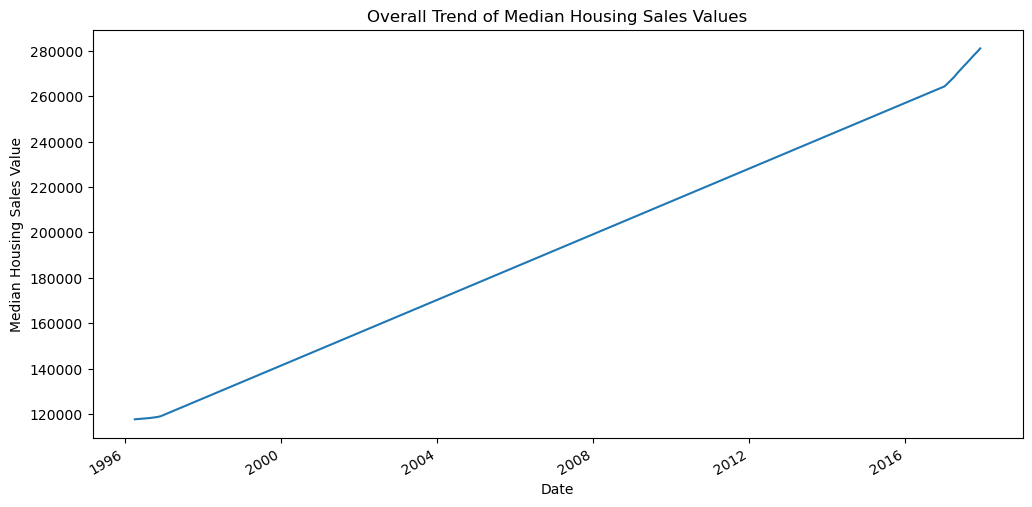

In [13]:
# Visual of overall trends

plt.figure(figsize=(12, 6))
df_date.groupby('Date')['Median_Housing_Sales_Value'].mean().plot()
plt.title('Overall Trend of Median Housing Sales Values')
plt.xlabel('Date')
plt.ylabel('Median Housing Sales Value')
plt.show()


As we can see the trend is an increasing linear trend, where we can see the median housing sales value increases every year.

<Figure size 1200x600 with 0 Axes>

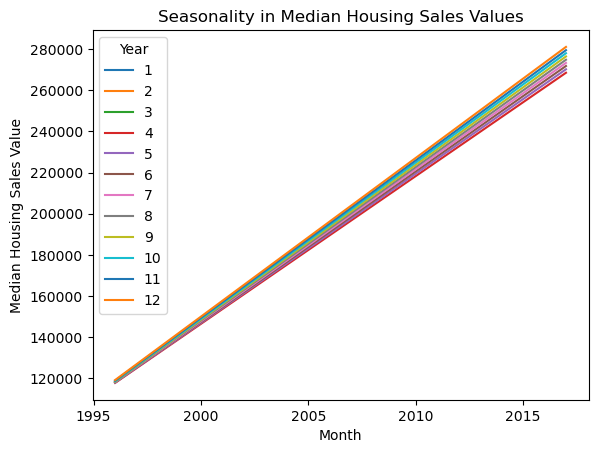

In [14]:
#Check for seasonal patterns by plotting data for each year.

df_date['Year'] = df_date['Date'].dt.year
df_date['Month'] = df_date['Date'].dt.month

plt.figure(figsize=(12, 6))
df_date.groupby(['Year', 'Month'])['Median_Housing_Sales_Value'].mean().unstack().plot()
plt.title('Seasonality in Median Housing Sales Values')
plt.xlabel('Month')
plt.ylabel('Median Housing Sales Value')
plt.legend(title='Year')
plt.show()


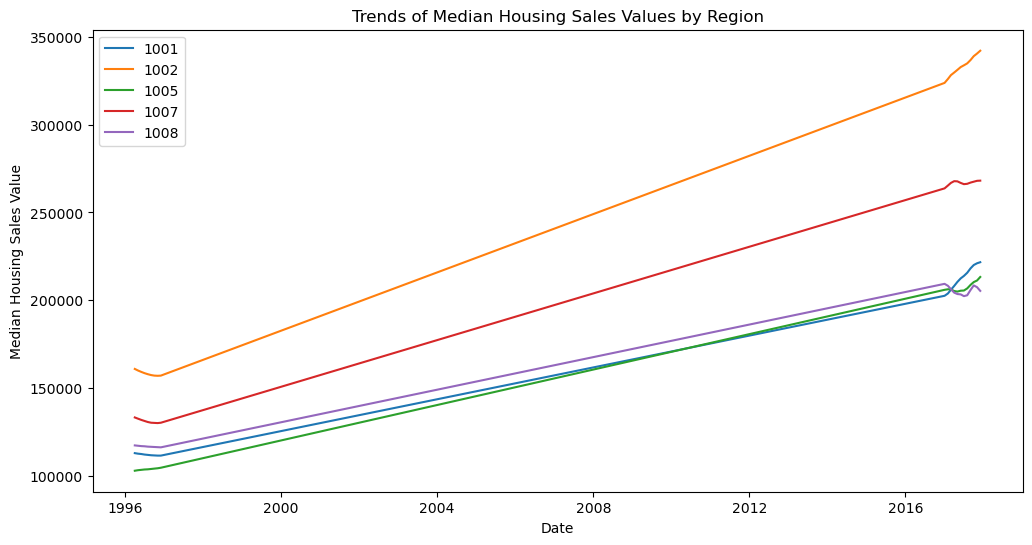

In [16]:
regions = df_date['RegionName'].unique()

plt.figure(figsize=(12, 6))
for region in regions[:5]:  # Limiting to first 5 regions for simplicity
    df_region = df_date[df_date['RegionName'] == region]
    plt.plot(df_region['Date'], df_region['Median_Housing_Sales_Value'], label=region)

plt.title('Trends of Median Housing Sales Values by Region')
plt.xlabel('Date')
plt.ylabel('Median Housing Sales Value')
plt.legend()
plt.show()


Next we need to find and plot the worst and best performing zips according to our data 

In [20]:
# Calculate the average median sales value for each zip code
avg_sales_value_by_zip = df_date.groupby('RegionName')['Median_Housing_Sales_Value'].mean().reset_index()
avg_sales_value_by_zip.rename(columns={'Median_Housing_Sales_Value': 'Avg_Median_Sales_Value'}, inplace=True)

# Sort the zip codes based on average median sales value
best_performing_zips = avg_sales_value_by_zip.sort_values(by='Avg_Median_Sales_Value', ascending=False).head(5)
worst_performing_zips = avg_sales_value_by_zip.sort_values(by='Avg_Median_Sales_Value').head(5)


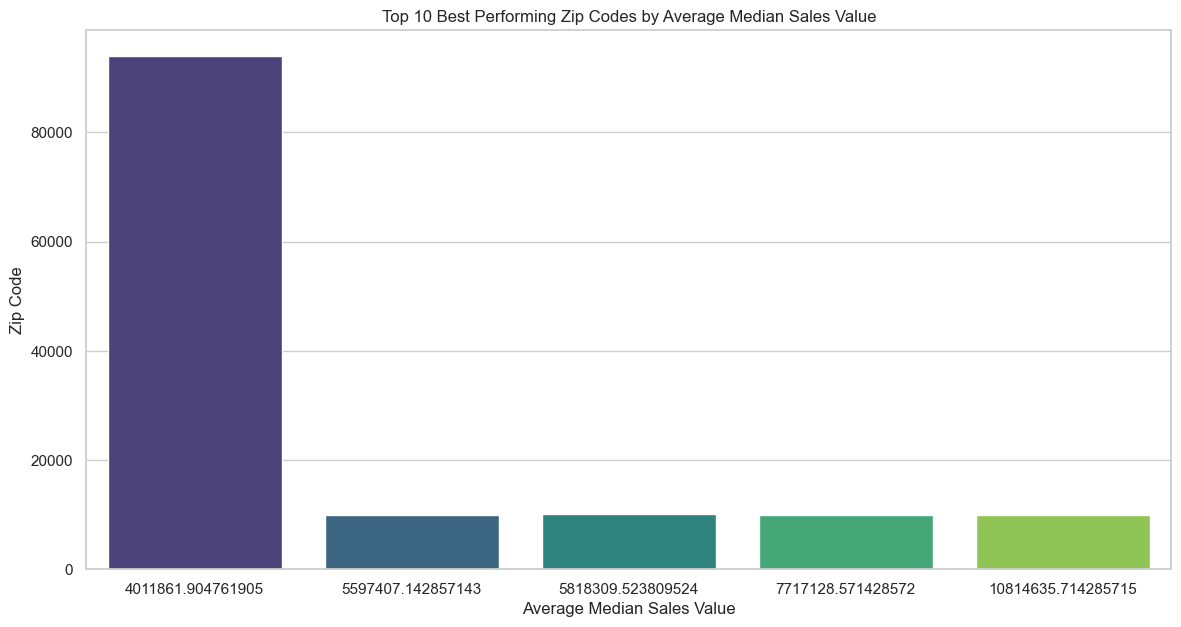

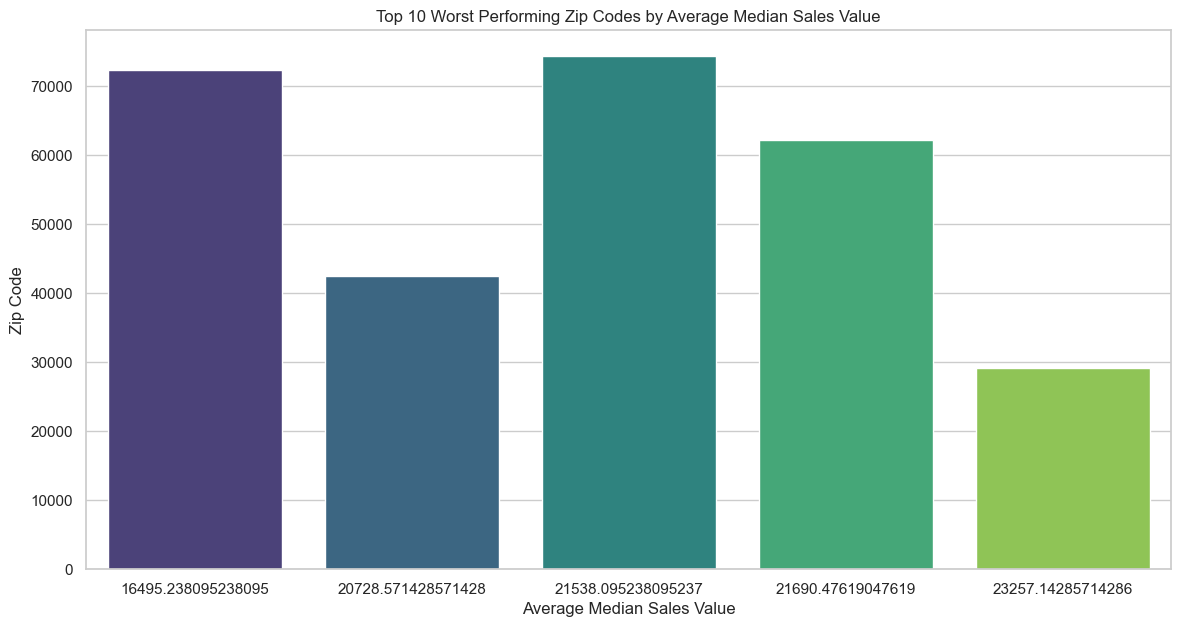

In [21]:

# Set the visualisation style
sns.set(style="whitegrid")

# Plot the top 5 best performing zip codes
plt.figure(figsize=(14, 7))
sns.barplot(x='Avg_Median_Sales_Value', y='RegionName', data=best_performing_zips, palette='viridis')
plt.title('Top 10 Best Performing Zip Codes by Average Median Sales Value')
plt.xlabel('Average Median Sales Value')
plt.ylabel('Zip Code')
plt.show()

# Plot the top 5 worst performing zip codes
plt.figure(figsize=(14, 7))
sns.barplot(x='Avg_Median_Sales_Value', y='RegionName', data=worst_performing_zips, palette='viridis')
plt.title('Top 10 Worst Performing Zip Codes by Average Median Sales Value')
plt.xlabel('Average Median Sales Value')
plt.ylabel('Zip Code')
plt.show()
